In [47]:
#ELASTIC ANALYSIS(CONSTANT FORCE)

import numpy as np
import matplotlib.pyplot as plt

# Constants from M Paz (#Illustrative example 19.1)
pi = np.pi
k1 = 30.7
k2 = 44.3
m1 = 0.136
m2 = 0.066
c1 = 0
c2 = 0
del_t = 0.02
theta = 1.4
tau = theta*del_t
a1 = 3/tau
a2=6/tau
a3=tau/2
a4=(6/tau**2)

M = np.array([[m1,0],[0,m2]])              #MASS MATRIX
K = np.array([[k1+k2,-k2],[-k2,k2]])       #STIFFNESS MATRIX
C = np.array([[c1+c2,-c2],[-c2,c2]])       #DAMPING MATRIX

eigenvalues, eigenvectors = np.linalg.eig(K @ np.linalg.inv(M))
nat_freq = np.sqrt(eigenvalues)
w1 = nat_freq[0]                           #NATURAL FREQUENCY
w2=nat_freq[1]                             #NATURAL FREQUENCY

T1=(2*pi/w1)
T2=(2*pi/w2)
Tmax=5*np.maximum(T1,T2)

time1=np.linspace(0,Tmax,100)
ntime=time1.reshape(-1,1)

del_cap_Fbar = np.zeros([2,1])
del_cap_F = np.zeros([2,1])
vel = np.zeros([2,len(time1)])            #ASSIGNING VALUES TO VELOCITY
disp = np.zeros([2,len(time1)])           #ASSIGNING VALUES TO DISPLACEMENT
acc = np.zeros([2,len(time1)])            #ASSIGNING VALUES TO ACCELERATION

#F0 = np.array([0,10]).reshape(-1,1)        #CONSTANT FORCE APPLIED TO MASS 1
#F0 = np.array([10,0]).reshape(-1,1)       #CONSTANT FORCE APPLIED TO MASS 2
F0 = np.array([10,10]).reshape(-1,1)      #CONSTANT FORCE APPLIED TO BOTH THE MASSES

acc[:,[0]] = np.dot(np.linalg.inv(M),F0)   #INITIAL ACCELERATION
K_bar = np.round((K + a4*M + a1*C),4)

for i in range(0,len(time1)-1,1):
 del_cap_Fbar = del_cap_F + np.dot((a2*M + 3*C),vel[:,[i]]) + np.dot((3*M + a3*C),acc[:,[i]])
 dcy=np.linalg.solve(K_bar,del_cap_Fbar)
 delc_yddot = a4*dcy-a2*vel[:,[i]]-3*acc[:,[i]]
 del_yddot = delc_yddot/theta
 del_ydot = acc[:,[i]]*del_t + 1/2*del_yddot*del_t
 del_y = vel[:,[i]]*del_t + 1/2*acc[:,[i]]*del_t**2 + 1/6*del_yddot*del_t**2

 disp[:,[i+1]] = disp[:,[i]] + del_y                                      #DISPLACEMENT FOR FIRST STEP
 vel[:,[i+1]] = vel[:,[i]] + del_ydot                                     #VELOCITY FOR FIRST STEP
 acc[:,[i+1]] = np.dot(np.linalg.inv(M),(F0-np.dot(K,disp[:,[i+1]])))     #ACCELERATION FOR FIRST STEP


In [48]:
print(disp[0,:])                                                         #DISPLACEMENT VALUUES OUTPUT
print(vel[0,:])                                                          #VELOCITY VALUES OUTPUT
print(acc[0,:])                                                          #ACCELERATION VALUES OUTPUT

[ 0.          0.0148239   0.05973793  0.13544243  0.2416658   0.37566182
  0.53114815  0.6982174   0.86439679  1.01660024  1.14337488  1.2367249
  1.29294753  1.31227938  1.29758791  1.25268276  1.18093556  1.08474041
  0.96598452  0.82727029  0.67330698  0.511798    0.35332746  0.21012936
  0.09405687  0.01439019 -0.02379779 -0.02019001  0.02144885  0.09486465
  0.19319897  0.31046396  0.44209763  0.58447936  0.7337169   0.88432007
  1.02843396  1.15609133  1.25654256  1.32028831  1.34114367  1.31762065
  1.25314637  1.15504984  1.03269214  0.89541213  0.75099966  0.60517547
  0.46214369  0.3258507   0.20130202  0.09526719  0.01595085 -0.02837131
 -0.03132382  0.00968731  0.09238232  0.20973555  0.35131742  0.50540728
  0.66116302  0.81013497  0.94668264  1.06728843  1.16919222  1.24902815
  1.30212871  1.32287905  1.30606658  1.24874856  1.15192084  1.02130917
  0.86690854  0.70135031  0.53760607  0.38677647  0.25666946  0.15156296
  0.07309202  0.02177635 -0.00152471  0.00511214  0.

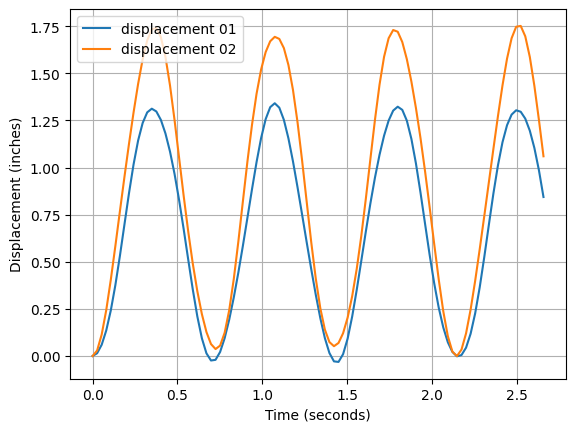

In [49]:
plt.plot(time1,disp[0,:],label='displacement 01')                         #DISPLACEMENT 1 VS TIME OUTPUT
plt.plot(time1,disp[1,:],label='displacement 02')                        #DISPLACEMENT 2 VS TIME OUTPUT
plt.xlabel('Time (seconds)')
plt.ylabel('Displacement (inches)')

plt.legend()
plt.grid()

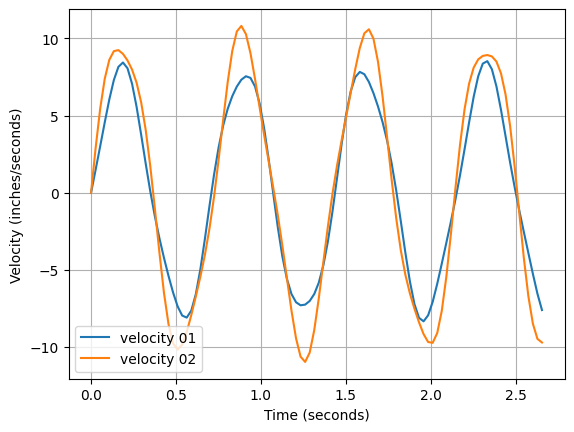

In [50]:
plt.plot(time1,vel[0,:],label='velocity 01')                             #VELOCITY 1 VS TIME OUTPUT
plt.plot(time1,vel[1,:],label='velocity 02')                             #VELOCITY 2 VS TIME OUTPUT
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (inches/seconds)')
plt.legend()
plt.grid()

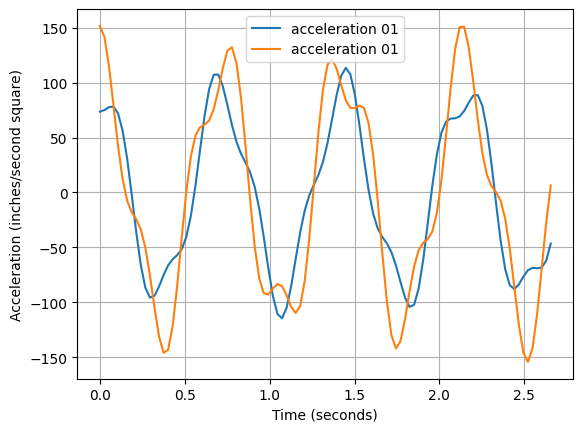

In [51]:
plt.plot(time1,acc[0,:],label='acceleration 01')                         #ACCELERATION 1 VS TIME OUTPUT
plt.plot(time1,acc[1,:],label='acceleration 01')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (inches/second square)')

plt.legend()
plt.grid()

In [52]:
#INELASTIC ANALYSIS(CONSTANT FORCE)

import numpy as np
import matplotlib.pyplot as plt

# Constants from M Paz (#Illustrative example 19.1)
pi = np.pi
k1 = 30.7
k2 = 44.3
m1 = 0.136
m2 = 0.066
c1 = 0
c2 = 0
del_t = 0.02
theta = 1.4
tau = theta*del_t
a1 = 3/tau
a2=6/tau
a3=tau/2
a4=(6/tau**2)

M = np.array([[m1,0],[0,m2]])
K = np.array([[k1+k2,-k2],[-k2,k2]])
C = np.array([[c1+c2,-c2],[-c2,c2]])

eigenvalues, eigenvectors = np.linalg.eig(K @ np.linalg.inv(M))
nat_freq = np.sqrt(eigenvalues)
w1 = nat_freq[0]
w2=nat_freq[1]

p1=(w1/2)
p2=(w2/2)
T1=(2*pi/w1)
T2=(2*pi/w2)
Tmax=5*np.maximum(T1,T2)

time1=np.linspace(0,Tmax,100)
ntime=time1.reshape(-1,1)

del_cap_Fbar = np.zeros([2,1])
del_cap_F = np.zeros([2,1])
vel = np.zeros([2,len(time1)])
disp = np.zeros([2,len(time1)])
acc = np.zeros([2,len(time1)])
yp = np.zeros([2,len(time1)])

#F0 = np.array([0,10]).reshape(-1,1)
#F0 = np.array([10,0]).reshape(-1,1)
F0 = np.array([10,10]).reshape(-1,1)

R = np.zeros([2,len(time1)])
a = np.zeros([2,len(time1)])
q = np.zeros([2,len(time1)])
R01,R02 = 1.5*k1,1.5*k2
A1=0
A2=0
B1=0
B2=0

# Constitutive law
def const_law(delta_d, k, R0, R_i, A, a_i, q_i, B):
    delta_R_tr = k*delta_d                           # Trial solution for dR
    f = (R_i + delta_R_tr - q_i)**2-(R0 + A*a_i)**2  # Yield function
    if f >= 0 and R_i*delta_d > 0:                   # Condition for plasticity
        delta_yp = k/(k+A+B)*delta_d                 # Plastic displacement during plastic step
    else:                                            # Else elastic
        delta_yp = 0                                 # Plastic displacement during elastic step
    delta_R = k*(delta_d - delta_yp)                 # Change in restoring force
    delta_a = abs(delta_yp)                          # Change in internal hardening variable
    delta_q = B*delta_yp                             # Change in back stress
    K = delta_R/delta_d                              # K for the next step
    return K, delta_R, delta_a, delta_q, delta_yp

acc[:,[0]] = np.dot(np.linalg.inv(M),F0)
K_bar = np.round((K + a4*M + a1*C),4)

for i in range(0,len(time1)-1,1):
 del_cap_Fbar = del_cap_F + np.dot((a2*M + 3*C),vel[:,[i]]) + np.dot((3*M + a3*C),acc[:,[i]])
 dcy=np.linalg.solve(K_bar,del_cap_Fbar)
 delc_yddot = a4*dcy-a2*vel[:,[i]]-3*acc[:,[i]]
 del_yddot = delc_yddot/theta
 del_ydot = acc[:,[i]]*del_t + 1/2*del_yddot*del_t
 del_y = vel[:,[i]]*del_t + 1/2*acc[:,[i]]*del_t**2 + 1/6*del_yddot*del_t**2

 disp[:,[i+1]] = disp[:,[i]] + del_y
 vel[:,[i+1]] = vel[:,[i]] + del_ydot
 acc[:,[i+1]] = np.dot(np.linalg.inv(M),(F0-np.dot(K,disp[:,[i+1]])))

 for j in range(0,2,1):
  dy_J = del_y[j,0]
  k_J,R0_J = globals()['k'+str(j+1)],globals()['R0'+str(j+1)]
  A_J,B_J =  globals()['A'+str(j+1)],globals()['B'+str(j+1)]
  R_ij,a_ij,q_ij = R[j,i],a[j,i],q[j,i]

  globals()['k'+str(j+1)], dR, da, dq, dyp = const_law(dy_J,k_J,R0_J,R_ij,A_J,a_ij,q_ij,B_J)

  R[j,i+1] = R[j,i] + dR                              # Updating restoring force at the end of the time step
  a[j,i+1] = a[j,i] + da                              # Updating internal hardening variable at the end of the time step
  q[j,i+1] = q[j,i] + dq                              # Updating back stress at the end of the time step
  yp[j,i+1] = yp[j,i] + dyp                           # Updating plastic displacement at the end of the time step

 K = np.array([[k1+k2,-k2],[-k2,k2]])

#by1 = np.array([0.000,0.001,0.007,0.025,0.066,0.134,0.229,0.342,0.458,0.562,0.639,
               #0.682,0.693,0.680,0.653,0.623,0.592,0.560,0.517,0.458,0.375])
#by2 = np.array([0.000,0.029,0.107,0.218,0.339,0.449,0.539,0.609,0.668,0.731,0.806,
               #0.893,0.982,1.054,1.087,1.069,0.995,0.876,0.735,0.591,0.457])
#byd1 = np.array([0.000,0.119,0.533,1.405,2.685,4.111,5.297,5.875,5.635,4.601,3.031,
                #1.321,-0.133,-1.077,-1.483,-1.535,-1.546,-1.814,-2.490,-3.521,-4.677])
#byd2 = np.array([0.000,2.778,4.911,5.978,5.923,5.064,3.946,3.124,2.938,3.377,4.090,
                #4.532,4.188,2.795,0.465,-2.333,-4.932,-6.702,-7.273,-7.065,-6.589])
#bydd1 = np.array([0.000,8.886,31.343,57.243,74.236,72.678,49.555,9.871,-35.066,-71.805,-89.763,
                 #-85.142,-62.247,-31.685,-6.153,4.540,-2.702,-23.111,-45.996,-59.860,-58.224])
#bydd2 = np.array([0.000,132.836,83.897,21.894,-31.939,-60.432,-56.959,-27.793,10.584,38.161,39.457,
                 #9.826,-42.495,-99.378,-139.725,-147.611,-118.509,-61.154,5.693,62.048,-54.643])



In [53]:
print(disp[0,:])
print(vel)
print(acc)

[ 0.          0.0148239   0.05973793  0.13544243  0.2416658   0.37566182
  0.53114815  0.6982174   0.86439679  1.01660024  1.14337488  1.2367249
  1.29294753  1.28988878  1.21223808  1.07295903  0.88883657  0.67901947
  0.46343941  0.26123845  0.08932985 -0.03879967 -0.11396261 -0.13176451
 -0.09269777 -0.0018471   0.13175157  0.29603156  0.47700902  0.65999252
  0.83078842  0.97680714  1.08798764  1.15747614  1.18201734  1.16204128
  1.10145393  1.00716244  0.88838571  0.75581516  0.62069958  0.49393002
  0.3851973   0.30228517  0.25054853  0.23260896  0.24828117  0.29472494
  0.3667995   0.4575827   0.55900566  0.66254728  0.75993062  0.84376613
  0.90809335  0.94878312  0.96377542  0.95314192  0.91897679  0.86513288
  0.79683158  0.72018329  0.641661    0.56757067  0.50356062  0.45420676
  0.42270279  0.41067485  0.41812913  0.44353021  0.48399744  0.53559829
  0.59371059  0.65342171  0.70993128  0.75892549  0.79689469  0.82137193
  0.83107738  0.8259619   0.80715107  0.77679905  0.

/tmp/ipython-input-4221345748.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


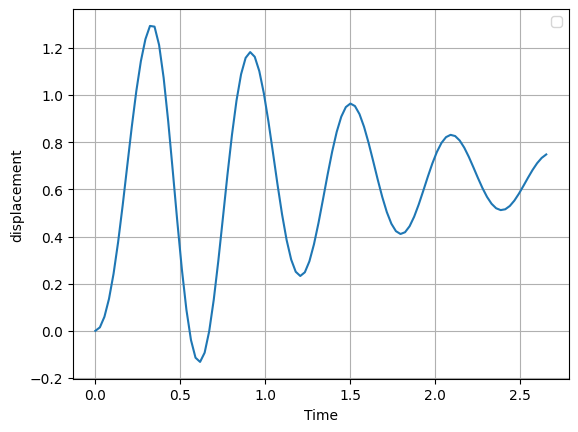

In [54]:
plt.plot(time1,disp[0,:])
#plt.plot(time1,disp[1,:])
plt.xlabel('Time')
plt.ylabel('displacement')

#plt.scatter(time1,by1,label='by1')

plt.grid()
plt.legend()

/tmp/ipython-input-3689572784.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


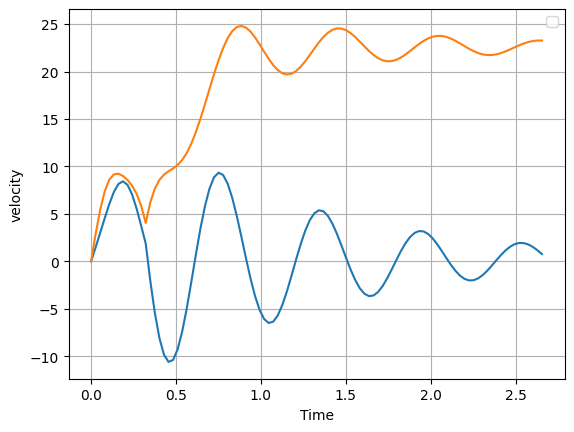

In [55]:
plt.plot(time1,vel[0,:])
plt.plot(time1,vel[1,:])
plt.xlabel('Time')
plt.ylabel('velocity')

#plt.scatter(time1,by1,label='by1')
plt.grid()
plt.legend()

/tmp/ipython-input-2064603440.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


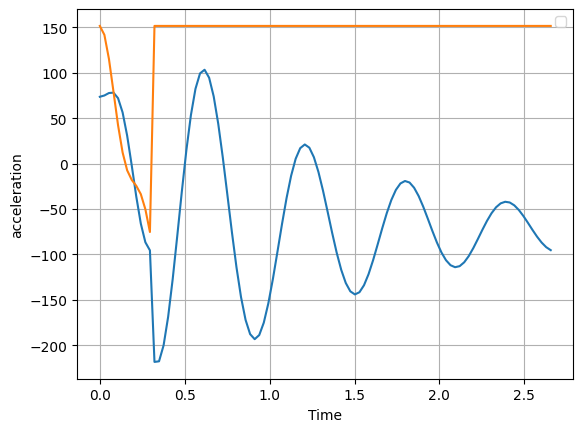

In [56]:
plt.plot(time1,acc[0,:])
plt.plot(time1,acc[1,:])
plt.xlabel('Time')
plt.ylabel('acceleration')


#plt.scatter(time1,by1,label='by1')
plt.grid()
plt.legend()

In [57]:
#ELASTIC ANALYSIS(SINUSOIDAL FORCE)

import numpy as np
import matplotlib.pyplot as plt

# Constants from M Paz (#Illustrative example 19.1)
pi = np.pi
k1 = 30.7
k2 = 44.3
m1 = 0.136
m2 = 0.066
c1 = 0
c2 = 0
theta = 1.4
del_t=0.02
tau = theta*del_t
a1 = 3/tau
a2=6/tau
a3=tau/2
a4=6/tau**2

M = np.array([[m1,0],[0,m2]])
K = np.array([[k1+k2,-k2],[-k2,k2]])
C = np.array([[c1+c2,-c2],[-c2,c2]])

eigenvalues, eigenvectors = np.linalg.eig(K @ np.linalg.inv(M))
nat_freq = np.sqrt(eigenvalues)
w1 = nat_freq[0]
w2=nat_freq[1]

p1=w1/2
p2=w2/2
T1=2*pi/w1
T2=2*pi/w2
Tmax=5*np.maximum(T1,T2)

time=np.linspace(0,Tmax,200)

F=np.zeros([2,len(time)])
del_cap_Fbar = np.zeros([2,1])
del_cap_F = np.zeros([2,1])

disp =np.zeros([2,len(time)])
vel =np.zeros([2,len(time)])
acc =np.zeros([2,len(time)])

#sinusoidal force input

for i in range(0,len(time),1):
 F[0,i]=10*np.sin(p1*time[i])
 F[1,i]=10*np.sin(p1*time[i])

acc[:,[0]] =np.dot(np.linalg.inv(M),F[:,[0]]-np.dot(K,disp[:,[0]]))
K_bar = K + a4*M + a1*C

for i in range(0,len(time)-2,1):
 del_cap_F = F[:,[i+1]] + (F[:,[i+2]]-F[:,[i+1]])*(theta-1) - F[:,[i]]
 del_cap_Fbar = del_cap_F + np.dot((a2*M + 3*C),vel[:,[i]]) + np.dot((3*M + a3*C),acc[:,[i]])
 dcy=np.linalg.solve(K_bar,del_cap_Fbar)
 delc_yddot = a4*dcy-a2*vel[:,[i]]-3*acc[:,[i]]
 del_yddot = delc_yddot/theta
 del_ydot = acc[:,[i]]*del_t + 1/2*del_yddot*del_t
 del_y = vel[:,[i]]*del_t + 1/2*acc[:,[i]]*del_t**2 + 1/6*del_yddot*del_t**2

 disp[:,[i+1]] = disp[:,[i]] + del_y
 vel[:,[i+1]] = vel[:,[i]] + del_ydot
 acc[:,[i+1]] = np.dot(np.linalg.inv(M),(F[:,[i+1]]-np.dot(K,disp[:,[i+1]])))


In [58]:
print(disp)
print(vel)
print(acc)

[[ 0.00000000e+00  3.90179391e-04  3.12607709e-03  1.05865503e-02
   2.51477286e-02  4.90335474e-02  8.40613776e-02  1.31341284e-01
   1.91017044e-01  2.62134050e-01  3.42683956e-01  4.29821370e-01
   5.20194312e-01  6.10297870e-01  6.96761244e-01  7.76511510e-01
   8.46809717e-01  9.05205711e-01  9.49487648e-01  9.77698943e-01
   9.88261015e-01  9.80188254e-01  9.53333101e-01  9.08573380e-01
   8.47862125e-01  7.74099571e-01  6.90843407e-01  6.01925453e-01
   5.11071025e-01  4.21610802e-01  3.36336859e-01  2.57499382e-01
   1.86890111e-01  1.25931846e-01  7.57007634e-02  3.68462382e-02
   9.42609295e-03 -7.27774279e-03 -1.48764182e-02 -1.58502684e-02
  -1.33531357e-02 -1.08716959e-02 -1.18165158e-02 -1.91448551e-02
  -3.51029256e-02 -6.11321595e-02 -9.79265664e-02 -1.45578485e-01
  -2.03726836e-01 -2.71633826e-01 -3.48157711e-01 -4.31643701e-01
  -5.19800546e-01 -6.09648195e-01 -6.97604545e-01 -7.79732857e-01
  -8.52113404e-01 -9.11255751e-01 -9.54449988e-01 -9.79973458e-01
  -9.87117

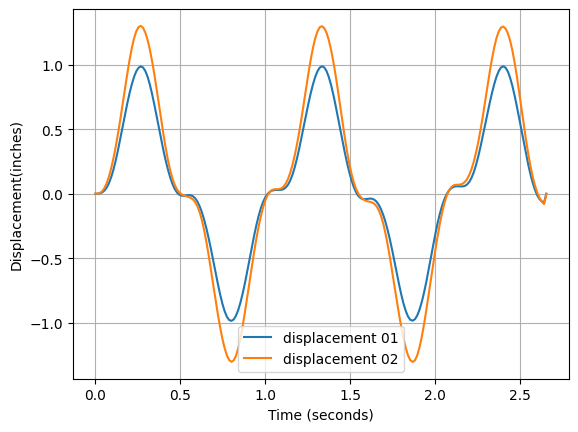

In [59]:
plt.plot(time,disp[0,:],label='displacement 01')
plt.plot(time,disp[1,:],label='displacement 02')
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement(inches)")

plt.legend()
plt.grid()

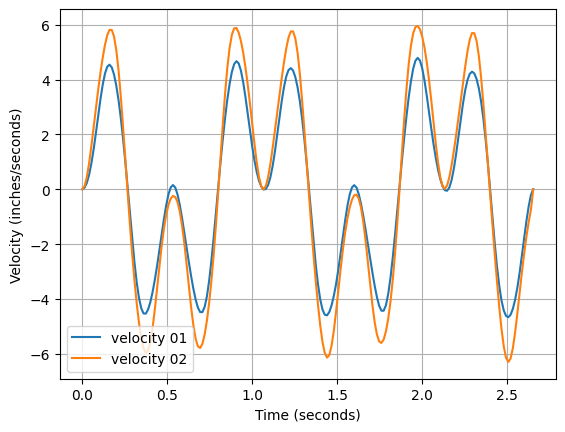

In [60]:
plt.plot(time,vel[0,:],label='velocity 01')
plt.plot(time,vel[1,:],label='velocity 02')
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (inches/seconds)")

plt.legend()
plt.grid()

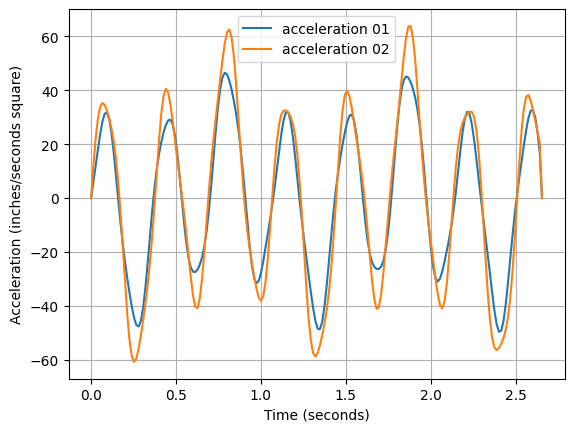

In [61]:
plt.plot(time,acc[0,:],label='acceleration 01')
plt.plot(time,acc[1,:],label='acceleration 02')
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (inches/seconds square)")

plt.legend()
plt.grid()

In [62]:
#INELASTIC ANALYSIS(SINUSOIDAL FORCE)

import numpy as np
import matplotlib.pyplot as plt

# Constants from M Paz (#Illustrative example 19.1)
pi = np.pi
k1 = 30.7
k2 = 44.3
m1 = 0.136
m2 = 0.066
c1 = 0
c2 = 0
theta = 1.4
del_t=0.02
tau = theta*del_t
a1 = 3/tau
a2=6/tau
a3=tau/2
a4=6/tau**2

M = np.array([[m1,0],[0,m2]])
K = np.array([[k1+k2,-k2],[-k2,k2]])
C = np.array([[c1+c2,-c2],[-c2,c2]])

eigenvalues, eigenvectors = np.linalg.eig(K @ np.linalg.inv(M))
nat_freq = np.sqrt(eigenvalues)
w1 = nat_freq[0]
w2=nat_freq[1]

p1=w1/2
p2=w2/2
T1=2*pi/w1
T2=2*pi/w2
Tmax=5*np.maximum(T1,T2)

time=np.linspace(0,Tmax,500)

F=np.zeros([2,len(time)])
del_cap_Fbar = np.zeros([2,1])
del_cap_F = np.zeros([2,1])

disp =np.zeros([2,len(time)])
vel =np.zeros([2,len(time)])
acc =np.zeros([2,len(time)])

#sinusoidal force input

for i in range(0,len(time),1):
 F[0,i]=10*np.sin(p1*time[i])
 F[1,i]=10*np.sin(p1*time[i])

acc[:,[0]] =np.dot(np.linalg.inv(M),F[:,[0]]-np.dot(K,disp[:,[0]]))
K_bar = K + a4*M + a1*C
#print(acc)

R = np.zeros([2,len(time)])
a = np.zeros([2,len(time)])
q = np.zeros([2,len(time)])
yp = np.zeros([2,len(time)])
R01,R02 = 1.5*k1,1.5*k2
A1=0
A2=0
B1=0
B2=0

# Constitutive law
def const_law(delta_d, k, R0, R_i, A, a_i, q_i, B):
    delta_R_tr = k*delta_d                           # Trial solution for dR
    f = (R_i + delta_R_tr - q_i)**2-(R0 + A*a_i)**2  # Yield function
    if f >= 0 and R_i*delta_d > 0:                   # Condition for plasticity
        delta_yp = k/(k+A+B)*delta_d                 # Plastic displacement during plastic step
    else:                                            # Else elastic
        delta_yp = 0                                 # Plastic displacement during elastic step
    delta_R = k*(delta_d - delta_yp)                 # Change in restoring force
    delta_a = abs(delta_yp)                          # Change in internal hardening variable
    delta_q = B*delta_yp                             # Change in back stress
    K = delta_R/delta_d                              # K for the next step
    return K, delta_R, delta_a, delta_q, delta_yp

for i in range(0,len(time)-2,1):
 del_cap_F = F[:,[i+1]] + (F[:,[i+2]]-F[:,[i+1]])*(theta-1) - F[:,[i]]
 del_cap_Fbar = del_cap_F + np.dot((a2*M + 3*C),vel[:,[i]]) + np.dot((3*M + a3*C),acc[:,[i]])
 dcy=np.linalg.solve(K_bar,del_cap_Fbar)
 delc_yddot = a4*dcy-a2*vel[:,[i]]-3*acc[:,[i]]
 del_yddot = delc_yddot/theta
 del_ydot = acc[:,[i]]*del_t + 1/2*del_yddot*del_t
 del_y = vel[:,[i]]*del_t + 1/2*acc[:,[i]]*del_t**2 + 1/6*del_yddot*del_t**2

 disp[:,[i+1]] = disp[:,[i]] + del_y
 vel[:,[i+1]] = vel[:,[i]] + del_ydot
 acc[:,[i+1]] = np.dot(np.linalg.inv(M),(F[:,[i+1]]-np.dot(K,disp[:,[i+1]])))

 for j in range(0,2,1):
  dy_J = del_y[j,0]
  k_J,R0_J = globals()['k'+str(j+1)],globals()['R0'+str(j+1)]
  A_J,B_J =  globals()['A'+str(j+1)],globals()['B'+str(j+1)]
  R_ij,a_ij,q_ij = R[j,i],a[j,i],q[j,i]

  globals()['k'+str(j+1)], dR, da, dq, dyp = const_law(dy_J,k_J,R0_J,R_ij,A_J,a_ij,q_ij,B_J)

  R[j,i+1] = R[j,i] + dR                              # Updating restoring force at the end of the time step
  a[j,i+1] = a[j,i] + da                              # Updating internal hardening variable at the end of the time step
  q[j,i+1] = q[j,i] + dq                              # Updating back stress at the end of the time step
  yp[j,i+1] = yp[j,i] + dyp                           # Updating plastic displacement at the end of the time step

 K = np.array([[k1+k2,-k2],[-k2,k2]])


In [63]:
print(disp)
print(vel)
print(acc)

[[ 0.00000000e+00  1.55972007e-04  1.24998296e-03  4.23798197e-03
   1.00846945e-02  1.97088621e-02  3.38862497e-02  5.31332694e-02
   7.76057909e-02  1.07046594e-01  1.40801105e-01  1.77899611e-01
   2.17183155e-01  2.57437604e-01  2.97500782e-01  3.36320637e-01
   3.72963049e-01  4.06587895e-01  4.36423625e-01  4.61769302e-01
   4.82039472e-01  4.96846695e-01  5.06097362e-01  5.10066242e-01
   5.09418285e-01  5.05161663e-01  4.98538243e-01  4.90878084e-01
   4.83455616e-01  4.77382565e-01  4.73557641e-01  4.72671296e-01
   4.75243965e-01  4.81665760e-01  4.92208526e-01  5.06996209e-01
   5.25940537e-01  5.48667622e-01  5.74469744e-01  6.02311607e-01
   6.30903374e-01  6.58830187e-01  6.84708248e-01  7.07328363e-01
   7.25752729e-01  7.39347691e-01  7.47757871e-01  7.50846568e-01
   7.48636450e-01  7.41279800e-01  7.29071096e-01  7.12493133e-01
   6.92269958e-01  6.69392749e-01  6.45091574e-01  6.20744244e-01
   5.97736278e-01  5.77304601e-01  5.60404716e-01  5.47633936e-01
   5.39224

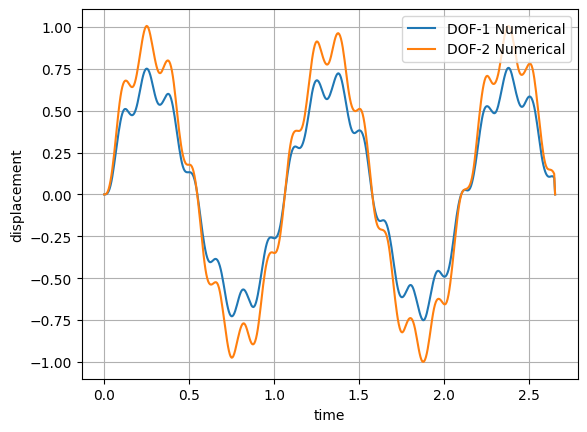

In [64]:
plt.plot(time,disp[0,:],label='DOF-1 Numerical')
plt.plot(time,disp[1,:],label='DOF-2 Numerical')
plt.xlabel("time")
plt.ylabel("displacement")

plt.legend()
plt.grid()

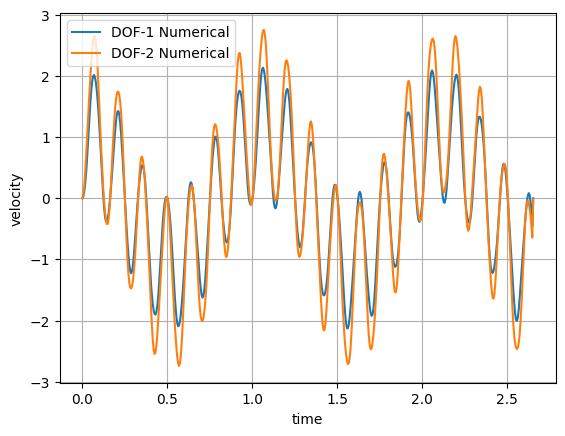

In [65]:
plt.plot(time,vel[0,:],label='DOF-1 Numerical')
plt.plot(time,vel[1,:],label='DOF-2 Numerical')
plt.xlabel("time")
plt.ylabel("velocity")

plt.legend()
plt.grid()

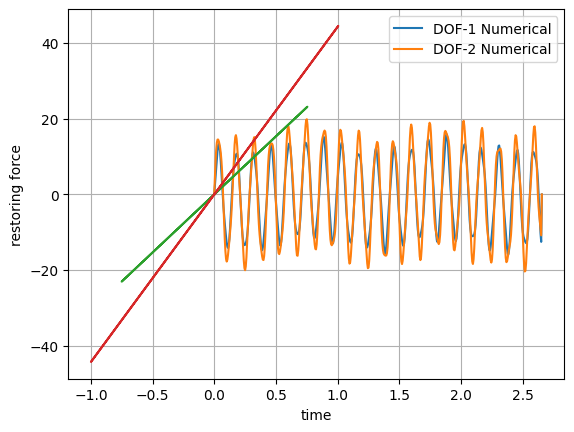

In [66]:

plt.plot(time,acc[0,:],label='DOF-1 Numerical')
plt.plot(time,acc[1,:],label='DOF-2 Numerical')
plt.xlabel("time")
plt.ylabel("acceleration")

plt.plot(disp[0,:],R[0,:])
plt.plot(disp[1,:],R[1,:])
plt.xlabel("time")
plt.ylabel("restoring force")

plt.legend()
plt.grid()